In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
# Set paths
train_dir = 'split-data/train'
val_dir = 'split-data/val'

In [3]:
# Image parameters
img_size = 256
batch_size = 8
num_classes = 1

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
)

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 320 images belonging to 2 classes.


In [7]:
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 80 images belonging to 2 classes.


In [8]:
# Build the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
preds = Dense(1, activation='sigmoid')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=preds)

In [11]:
model.summary

<bound method Model.summary of <Functional name=functional, built=True>>

In [12]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# Compile with additional metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc_roc')
    ]
)

In [13]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    ModelCheckpoint('resnet50.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

In [14]:
# Train (Warm-up)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks
)

d:\Dissertation-Project\Projects\code\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5727 - auc_roc: 0.6267 - loss: 0.6538 - precision: 0.5896 - recall: 0.5686
Epoch 1: val_loss improved from inf to 0.72301, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 717ms/step - accuracy: 0.5730 - auc_roc: 0.6276 - loss: 0.6532 - precision: 0.5892 - recall: 0.5711 - val_accuracy: 0.5000 - val_auc_roc: 0.8706 - val_loss: 0.7230 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6894 - auc_roc: 0.7557 - loss: 0.5803 - precision: 0.6216 - recall: 0.8543
Epoch 2: val_loss improved from 0.72301 to 0.72051, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 576ms/step - accuracy: 0.6897 - auc_roc: 0.7555 - loss: 0.5800 - precision: 0.6223 - recall: 0.8544 - val_accuracy: 0.5000 - val_auc_roc: 0.8687 - val_loss: 0.7205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.6961 - auc_roc: 0.7541 - loss: 0.5618 - precision: 0.6731 - recall: 0.8151
Epoch 3: val_loss improved from 0.72051 to 0.68450, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 567ms/step - accuracy: 0.6966 - auc_roc: 0.7548 - loss: 0.5614 - precision: 0.6732 - recall: 0.8154 - val_accuracy: 0.5000 - val_auc_roc: 0.8800 - val_loss: 0.6845 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.7536 - auc_roc: 0.7882 - loss: 0.5466 - precision: 0.7182 - recall: 0.8721
Epoch 4: val_loss improved from 0.68450 to 0.67914, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 613ms/step - accuracy: 0.7538 - auc_roc: 0.7889 - loss: 0.5457 - precision: 0.7179 - recall: 0.8727 - val_accuracy: 0.5000 - val_auc_roc: 0.8937 - val_loss: 0.6791 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.6892 - auc_roc: 0.7895 - loss: 0.5349 - precision: 0.6707 - recall: 0.8222
Epoch 5: val_loss improved from 0.67914 to 0.64455, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 556ms/step - accuracy: 0.6899 - auc_roc: 0.7901 - loss: 0.5343 - precision: 0.6708 - recall: 0.8232 - val_accuracy: 0.5000 - val_auc_roc: 0.8887 - val_loss: 0.6446 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7069 - auc_roc: 0.8020 - loss: 0.5349 - precision: 0.6741 - recall: 0.8140
Epoch 6: val_loss improved from 0.64455 to 0.61447, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 611ms/step - accuracy: 0.7070 - auc_roc: 0.8017 - loss: 0.5350 - precision: 0.6740 - recall: 0.8142 - val_accuracy: 0.5000 - val_auc_roc: 0.8909 - val_loss: 0.6145 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7647 - auc_roc: 0.8468 - loss: 0.4615 - precision: 0.7095 - recall: 0.8926
Epoch 7: val_loss improved from 0.61447 to 0.57347, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 572ms/step - accuracy: 0.7645 - auc_roc: 0.8463 - loss: 0.4619 - precision: 0.7095 - recall: 0.8924 - val_accuracy: 0.5500 - val_auc_roc: 0.9022 - val_loss: 0.5735 - val_precision: 1.0000 - val_recall: 0.1000 - learning_rate: 1.0000e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7394 - auc_roc: 0.7878 - loss: 0.5301 - precision: 0.6677 - recall: 0.8534
Epoch 8: val_loss improved from 0.57347 to 0.54362, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.7395 - auc_roc: 0.7879 - loss: 0.5298 - precision: 0.6684 - recall: 0.8536 - val_accuracy: 0.7500 - val_auc_roc: 0.9097 - val_loss: 0.5436 - val_precision: 0.9167 - val_recall: 0.5500 - learning_rate: 1.0000e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.7527 - auc_roc: 0.8629 - loss: 0.4585 - precision: 0.7050 - recall: 0.8845
Epoch 9: val_loss improved from 0.54362 to 0.52300, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.7522 - auc_roc: 0.8621 - loss: 0.4592 - precision: 0.7045 - recall: 0.8843 - val_accuracy: 0.7875 - val_auc_roc: 0.9231 - val_loss: 0.5230 - val_precision: 0.7949 - val_recall: 0.7750 - learning_rate: 1.0000e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7449 - auc_roc: 0.8448 - loss: 0.4948 - precision: 0.6959 - recall: 0.8849
Epoch 10: val_loss improved from 0.52300 to 0.49624, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 556ms/step - accuracy: 0.7452 - auc_roc: 0.8445 - loss: 0.4948 - precision: 0.6962 - recall: 0.8847 - val_accuracy: 0.8375 - val_auc_roc: 0.9312 - val_loss: 0.4962 - val_precision: 0.8000 - val_recall: 0.9000 - learning_rate: 1.0000e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7782 - auc_roc: 0.8492 - loss: 0.4664 - precision: 0.7632 - recall: 0.8786
Epoch 11: val_loss improved from 0.49624 to 0.46036, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 537ms/step - accuracy: 0.7779 - auc_roc: 0.8488 - loss: 0.4667 - precision: 0.7621 - recall: 0.8785 - val_accuracy: 0.8125 - val_auc_roc: 0.9275 - val_loss: 0.4604 - val_precision: 0.7660 - val_recall: 0.9000 - learning_rate: 1.0000e-04
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.6820 - auc_roc: 0.7940 - loss: 0.5418 - precision: 0.6392 - recall: 0.7665
Epoch 12: val_loss improved from 0.46036 to 0.44955, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.6831 - auc_roc: 0.7942 - loss: 0.5413 - precision: 0.6407 - recall: 0.7675 - val_accuracy: 0.8500 - val_auc_roc: 0.9253 - val_loss: 0.4496 - val_precision: 0.8043 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7623 - auc_roc: 0.8380 - loss: 0.4888 - precision: 0.7436 - recall: 0.8467
Epoch 13: val_loss improved from 0.44955 to 0.41211, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 574ms/step - accuracy: 0.7624 - auc_roc: 0.8381 - loss: 0.4885 - precision: 0.7429 - recall: 0.8479 - val_accuracy: 0.8375 - val_auc_roc: 0.9194 - val_loss: 0.4121 - val_precision: 0.7872 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7938 - auc_roc: 0.8553 - loss: 0.4563 - precision: 0.7513 - recall: 0.8685
Epoch 14: val_loss improved from 0.41211 to 0.39399, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 534ms/step - accuracy: 0.7938 - auc_roc: 0.8554 - loss: 0.4563 - precision: 0.7514 - recall: 0.8686 - val_accuracy: 0.8500 - val_auc_roc: 0.9212 - val_loss: 0.3940 - val_precision: 0.8043 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.7904 - auc_roc: 0.8679 - loss: 0.4742 - precision: 0.7269 - recall: 0.8718
Epoch 15: val_loss improved from 0.39399 to 0.37689, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 548ms/step - accuracy: 0.7902 - auc_roc: 0.8677 - loss: 0.4742 - precision: 0.7274 - recall: 0.8714 - val_accuracy: 0.8375 - val_auc_roc: 0.9281 - val_loss: 0.3769 - val_precision: 0.7872 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 16/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7823 - auc_roc: 0.8230 - loss: 0.4951 - precision: 0.7135 - recall: 0.8795
Epoch 16: val_loss improved from 0.37689 to 0.36901, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 560ms/step - accuracy: 0.7824 - auc_roc: 0.8233 - loss: 0.4947 - precision: 0.7144 - recall: 0.8787 - val_accuracy: 0.8500 - val_auc_roc: 0.9281 - val_loss: 0.3690 - val_precision: 0.8043 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 17/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7925 - auc_roc: 0.8597 - loss: 0.4464 - precision: 0.7266 - recall: 0.9158
Epoch 17: val_loss improved from 0.36901 to 0.35415, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 548ms/step - accuracy: 0.7919 - auc_roc: 0.8592 - loss: 0.4469 - precision: 0.7266 - recall: 0.9142 - val_accuracy: 0.8500 - val_auc_roc: 0.9253 - val_loss: 0.3542 - val_precision: 0.8043 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 18/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7498 - auc_roc: 0.8629 - loss: 0.4709 - precision: 0.6686 - recall: 0.8758
Epoch 18: val_loss improved from 0.35415 to 0.34013, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 553ms/step - accuracy: 0.7506 - auc_roc: 0.8629 - loss: 0.4705 - precision: 0.6703 - recall: 0.8756 - val_accuracy: 0.8625 - val_auc_roc: 0.9303 - val_loss: 0.3401 - val_precision: 0.8085 - val_recall: 0.9500 - learning_rate: 1.0000e-04
Epoch 19/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7480 - auc_roc: 0.8177 - loss: 0.4890 - precision: 0.6948 - recall: 0.8684
Epoch 19: val_loss improved from 0.34013 to 0.33660, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 558ms/step - accuracy: 0.7486 - auc_roc: 0.8183 - loss: 0.4886 - precision: 0.6956 - recall: 0.8682 - val_accuracy: 0.8750 - val_auc_roc: 0.9362 - val_loss: 0.3366 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 20/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7359 - auc_roc: 0.8148 - loss: 0.5179 - precision: 0.6847 - recall: 0.8022
Epoch 20: val_loss improved from 0.33660 to 0.33451, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 552ms/step - accuracy: 0.7367 - auc_roc: 0.8149 - loss: 0.5172 - precision: 0.6859 - recall: 0.8032 - val_accuracy: 0.8750 - val_auc_roc: 0.9347 - val_loss: 0.3345 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 21/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7751 - auc_roc: 0.8444 - loss: 0.4822 - precision: 0.7456 - recall: 0.8609
Epoch 21: val_loss improved from 0.33451 to 0.32988, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 536ms/step - accuracy: 0.7748 - auc_roc: 0.8442 - loss: 0.4822 - precision: 0.7450 - recall: 0.8608 - val_accuracy: 0.8750 - val_auc_roc: 0.9275 - val_loss: 0.3299 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 22/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.7640 - auc_roc: 0.8752 - loss: 0.4504 - precision: 0.7352 - recall: 0.8633
Epoch 22: val_loss improved from 0.32988 to 0.32770, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 545ms/step - accuracy: 0.7646 - auc_roc: 0.8756 - loss: 0.4499 - precision: 0.7352 - recall: 0.8642 - val_accuracy: 0.8750 - val_auc_roc: 0.9281 - val_loss: 0.3277 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 23/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7900 - auc_roc: 0.8645 - loss: 0.4568 - precision: 0.7331 - recall: 0.8974
Epoch 23: val_loss did not improve from 0.32770
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.7896 - auc_roc: 0.8638 - loss: 0.4576 - precision: 0.7329 - recall: 0.8969 - val_accuracy: 0.8750 - val_auc_roc: 0.9272 - val_loss: 0.3337 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 24/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7758 - auc_roc: 0.8847 - loss: 0.4306 - precision: 0.7137 - recall: 0.8960
Epoch 24: val_loss improved from 0.32770 to 0.32599, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 562ms/step - accuracy: 0.7758 - auc_roc: 0.8844 - loss: 0.4309 - precision: 0.7140 - recall: 0.8958 - val_accuracy: 0.8750 - val_auc_roc: 0.9256 - val_loss: 0.3260 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 25/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.7734 - auc_roc: 0.8608 - loss: 0.4488 - precision: 0.7297 - recall: 0.8456
Epoch 25: val_loss improved from 0.32599 to 0.32077, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 542ms/step - accuracy: 0.7733 - auc_roc: 0.8606 - loss: 0.4490 - precision: 0.7299 - recall: 0.8454 - val_accuracy: 0.8750 - val_auc_roc: 0.9319 - val_loss: 0.3208 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 26/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7591 - auc_roc: 0.8661 - loss: 0.4601 - precision: 0.7110 - recall: 0.8262
Epoch 26: val_loss improved from 0.32077 to 0.31378, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 563ms/step - accuracy: 0.7598 - auc_roc: 0.8661 - loss: 0.4598 - precision: 0.7119 - recall: 0.8271 - val_accuracy: 0.8750 - val_auc_roc: 0.9375 - val_loss: 0.3138 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 27/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7920 - auc_roc: 0.8731 - loss: 0.4345 - precision: 0.7711 - recall: 0.8726
Epoch 27: val_loss did not improve from 0.31378
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 545ms/step - accuracy: 0.7922 - auc_roc: 0.8732 - loss: 0.4343 - precision: 0.7707 - recall: 0.8732 - val_accuracy: 0.8750 - val_auc_roc: 0.9412 - val_loss: 0.3141 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 28/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8063 - auc_roc: 0.8967 - loss: 0.3998 - precision: 0.7674 - recall: 0.8867
Epoch 28: val_loss did not improve from 0.31378
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 550ms/step - accuracy: 0.8066 - auc_roc: 0.8968 - los

40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 555ms/step - accuracy: 0.8053 - auc_roc: 0.8785 - loss: 0.4243 - precision: 0.7371 - recall: 0.9157 - val_accuracy: 0.8750 - val_auc_roc: 0.9353 - val_loss: 0.3127 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 30/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8100 - auc_roc: 0.9028 - loss: 0.4136 - precision: 0.7459 - recall: 0.9032
Epoch 30: val_loss improved from 0.31267 to 0.30994, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 554ms/step - accuracy: 0.8101 - auc_roc: 0.9023 - loss: 0.4140 - precision: 0.7466 - recall: 0.9028 - val_accuracy: 0.8750 - val_auc_roc: 0.9412 - val_loss: 0.3099 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 31/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.7938 - auc_roc: 0.8928 - loss: 0.4151 - precision: 0.7440 - recall: 0.9050
Epoch 31: val_loss improved from 0.30994 to 0.30376, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 550ms/step - accuracy: 0.7940 - auc_roc: 0.8926 - loss: 0.4153 - precision: 0.7443 - recall: 0.9047 - val_accuracy: 0.8625 - val_auc_roc: 0.9403 - val_loss: 0.3038 - val_precision: 0.8085 - val_recall: 0.9500 - learning_rate: 1.0000e-04
Epoch 32/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7960 - auc_roc: 0.8577 - loss: 0.4586 - precision: 0.7462 - recall: 0.8695
Epoch 32: val_loss did not improve from 0.30376
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.7963 - auc_roc: 0.8579 - loss: 0.4582 - precision: 0.7467 - recall: 0.8700 - val_accuracy: 0.8750 - val_auc_roc: 0.9394 - val_loss: 0.3056 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 33/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7625 - auc_roc: 0.8845 - loss: 0.4179 - precision: 0.7234 - recall: 0.8306
Epoch 33: val_loss improved from 0.30376 to 0.30351, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 534ms/step - accuracy: 0.7626 - auc_roc: 0.8840 - loss: 0.4184 - precision: 0.7236 - recall: 0.8311 - val_accuracy: 0.8750 - val_auc_roc: 0.9441 - val_loss: 0.3035 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 34/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.7714 - auc_roc: 0.8945 - loss: 0.4212 - precision: 0.7397 - recall: 0.8363
Epoch 34: val_loss improved from 0.30351 to 0.30053, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.7712 - auc_roc: 0.8939 - loss: 0.4217 - precision: 0.7397 - recall: 0.8358 - val_accuracy: 0.8750 - val_auc_roc: 0.9444 - val_loss: 0.3005 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 35/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7284 - auc_roc: 0.8502 - loss: 0.4868 - precision: 0.6626 - recall: 0.8490
Epoch 35: val_loss improved from 0.30053 to 0.29785, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.7295 - auc_roc: 0.8504 - loss: 0.4859 - precision: 0.6644 - recall: 0.8488 - val_accuracy: 0.8750 - val_auc_roc: 0.9475 - val_loss: 0.2979 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 36/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8273 - auc_roc: 0.8820 - loss: 0.4215 - precision: 0.8061 - recall: 0.8617
Epoch 36: val_loss improved from 0.29785 to 0.29444, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.8270 - auc_roc: 0.8820 - loss: 0.4217 - precision: 0.8057 - recall: 0.8617 - val_accuracy: 0.8875 - val_auc_roc: 0.9553 - val_loss: 0.2944 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 37/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7454 - auc_roc: 0.7951 - loss: 0.5570 - precision: 0.6783 - recall: 0.8342
Epoch 37: val_loss did not improve from 0.29444
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 513ms/step - accuracy: 0.7456 - auc_roc: 0.7959 - loss: 0.5554 - precision: 0.6795 - recall: 0.8338 - val_accuracy: 0.8625 - val_auc_roc: 0.9403 - val_loss: 0.3054 - val_precision: 0.8222 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 38/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8325 - auc_roc: 0.9207 - loss: 0.3929 - precision: 0.7559 - recall: 0.9369
Epoch 38: val_loss did not improve from 0.29444
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 516ms/step - accuracy: 0.8320 - auc_roc: 0.9198 - los

40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 537ms/step - accuracy: 0.7460 - auc_roc: 0.8650 - loss: 0.4382 - precision: 0.7065 - recall: 0.8061 - val_accuracy: 0.9000 - val_auc_roc: 0.9594 - val_loss: 0.2943 - val_precision: 0.8478 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 40/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8137 - auc_roc: 0.8803 - loss: 0.4167 - precision: 0.7770 - recall: 0.8872
Epoch 40: val_loss improved from 0.29434 to 0.28620, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 532ms/step - accuracy: 0.8135 - auc_roc: 0.8804 - loss: 0.4168 - precision: 0.7766 - recall: 0.8873 - val_accuracy: 0.9000 - val_auc_roc: 0.9597 - val_loss: 0.2862 - val_precision: 0.8478 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 41/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7971 - auc_roc: 0.8747 - loss: 0.4217 - precision: 0.7544 - recall: 0.8863
Epoch 41: val_loss improved from 0.28620 to 0.28426, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.7971 - auc_roc: 0.8749 - loss: 0.4216 - precision: 0.7541 - recall: 0.8868 - val_accuracy: 0.8875 - val_auc_roc: 0.9594 - val_loss: 0.2843 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 42/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.8137 - auc_roc: 0.8968 - loss: 0.3996 - precision: 0.8053 - recall: 0.8458
Epoch 42: val_loss did not improve from 0.28426
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.8132 - auc_roc: 0.8960 - loss: 0.4008 - precision: 0.8043 - recall: 0.8459 - val_accuracy: 0.8875 - val_auc_roc: 0.9572 - val_loss: 0.2843 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 43/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8524 - auc_roc: 0.9389 - loss: 0.3422 - precision: 0.8059 - recall: 0.9228
Epoch 43: val_loss improved from 0.28426 to 0.28363, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - accuracy: 0.8518 - auc_roc: 0.9384 - loss: 0.3430 - precision: 0.8061 - recall: 0.9212 - val_accuracy: 0.8875 - val_auc_roc: 0.9591 - val_loss: 0.2836 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 44/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.7699 - auc_roc: 0.8745 - loss: 0.4395 - precision: 0.7145 - recall: 0.8283
Epoch 44: val_loss improved from 0.28363 to 0.28184, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 530ms/step - accuracy: 0.7705 - auc_roc: 0.8746 - loss: 0.4393 - precision: 0.7158 - recall: 0.8287 - val_accuracy: 0.8875 - val_auc_roc: 0.9612 - val_loss: 0.2818 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 45/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7981 - auc_roc: 0.8774 - loss: 0.4289 - precision: 0.7594 - recall: 0.9029
Epoch 45: val_loss did not improve from 0.28184
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 511ms/step - accuracy: 0.7983 - auc_roc: 0.8777 - loss: 0.4286 - precision: 0.7594 - recall: 0.9028 - val_accuracy: 0.8875 - val_auc_roc: 0.9591 - val_loss: 0.2836 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 46/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8103 - auc_roc: 0.9097 - loss: 0.3846 - precision: 0.7923 - recall: 0.8642
Epoch 46: val_loss improved from 0.28184 to 0.27453, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.8102 - auc_roc: 0.9093 - loss: 0.3852 - precision: 0.7917 - recall: 0.8647 - val_accuracy: 0.8750 - val_auc_roc: 0.9616 - val_loss: 0.2745 - val_precision: 0.8125 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 47/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.8311 - auc_roc: 0.8907 - loss: 0.4394 - precision: 0.8230 - recall: 0.8769
Epoch 47: val_loss did not improve from 0.27453
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.8304 - auc_roc: 0.8905 - loss: 0.4392 - precision: 0.8215 - recall: 0.8770 - val_accuracy: 0.9250 - val_auc_roc: 0.9609 - val_loss: 0.2830 - val_precision: 0.8864 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 48/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7865 - auc_roc: 0.8869 - loss: 0.4207 - precision: 0.7644 - recall: 0.8365
Epoch 48: val_loss improved from 0.27453 to 0.26964, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 526ms/step - accuracy: 0.7875 - auc_roc: 0.8874 - loss: 0.4199 - precision: 0.7651 - recall: 0.8376 - val_accuracy: 0.8875 - val_auc_roc: 0.9638 - val_loss: 0.2696 - val_precision: 0.8298 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 49/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7981 - auc_roc: 0.8799 - loss: 0.4234 - precision: 0.7617 - recall: 0.8516
Epoch 49: val_loss did not improve from 0.26964
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.7978 - auc_roc: 0.8797 - loss: 0.4237 - precision: 0.7616 - recall: 0.8514 - val_accuracy: 0.9125 - val_auc_roc: 0.9641 - val_loss: 0.2729 - val_precision: 0.8667 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 50/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8167 - auc_roc: 0.8793 - loss: 0.4162 - precision: 0.7511 - recall: 0.9300
Epoch 50: val_loss did not improve from 0.26964
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 516ms/step - accuracy: 0.8165 - auc_roc: 0.8795 - los

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Fine-tune: Unfreeze last few layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Freeze all except last 30 layers
    layer.trainable = False

In [17]:
# Compile again after unfreezing layers for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc_roc')
    ]
)

In [18]:
# Fine-tune training
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=35,
    callbacks=callbacks
)

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.6608 - auc_roc: 0.7451 - loss: 0.7655 - precision: 0.6566 - recall: 0.6797
Epoch 1: val_loss did not improve from 0.26964
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 812ms/step - accuracy: 0.6619 - auc_roc: 0.7459 - loss: 0.7639 - precision: 0.6573 - recall: 0.6813 - val_accuracy: 0.5000 - val_auc_roc: 0.5000 - val_loss: 9.1261 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.7275 - auc_roc: 0.8116 - loss: 0.6471 - precision: 0.7157 - recall: 0.7603
Epoch 2: val_loss did not improve from 0.26964
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 733ms/step - accuracy: 0.7281 - auc_roc: 0.8119 - loss: 0.6464 - precision: 0.7163 - recall: 0.7607 - val_accuracy: 0.5000 - val_auc_roc: 0.5000 - val_loss: 7.4664 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.7746 -

40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 767ms/step - accuracy: 0.7814 - auc_roc: 0.8998 - loss: 0.4539 - precision: 0.8331 - recall: 0.7610 - val_accuracy: 0.9000 - val_auc_roc: 0.9547 - val_loss: 0.2696 - val_precision: 0.9000 - val_recall: 0.9000 - learning_rate: 2.0000e-06
Epoch 9/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.8409 - auc_roc: 0.9120 - loss: 0.3950 - precision: 0.8395 - recall: 0.8548
Epoch 9: val_loss did not improve from 0.26963
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 732ms/step - accuracy: 0.8403 - auc_roc: 0.9115 - loss: 0.3963 - precision: 0.8386 - recall: 0.8543 - val_accuracy: 0.7500 - val_auc_roc: 0.9744 - val_loss: 0.4712 - val_precision: 0.9545 - val_recall: 0.5250 - learning_rate: 2.0000e-06
Epoch 10/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8137 - auc_roc: 0.8968 - loss: 0.4706 - precision: 0.8438 - recall: 0.7860
Epoch 10: val_loss did not improve from 0.26963
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 736ms/step - accuracy: 0.8138 - auc_roc: 0.8966 - loss:

40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 777ms/step - accuracy: 0.8423 - auc_roc: 0.8833 - loss: 0.5081 - precision: 0.8149 - recall: 0.8620 - val_accuracy: 0.8500 - val_auc_roc: 0.9844 - val_loss: 0.2572 - val_precision: 0.9667 - val_recall: 0.7250 - learning_rate: 8.0000e-08
Epoch 16/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.8487 - auc_roc: 0.9318 - loss: 0.3364 - precision: 0.8683 - recall: 0.8238
Epoch 16: val_loss improved from 0.25719 to 0.22388, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 765ms/step - accuracy: 0.8484 - auc_roc: 0.9314 - loss: 0.3373 - precision: 0.8676 - recall: 0.8241 - val_accuracy: 0.8875 - val_auc_roc: 0.9872 - val_loss: 0.2239 - val_precision: 0.9697 - val_recall: 0.8000 - learning_rate: 8.0000e-08
Epoch 17/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.8093 - auc_roc: 0.8995 - loss: 0.4343 - precision: 0.7858 - recall: 0.8381
Epoch 17: val_loss improved from 0.22388 to 0.22376, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 761ms/step - accuracy: 0.8095 - auc_roc: 0.8995 - loss: 0.4342 - precision: 0.7862 - recall: 0.8383 - val_accuracy: 0.8875 - val_auc_roc: 0.9878 - val_loss: 0.2238 - val_precision: 0.9697 - val_recall: 0.8000 - learning_rate: 8.0000e-08
Epoch 18/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.8618 - auc_roc: 0.9291 - loss: 0.3459 - precision: 0.8471 - recall: 0.8842
Epoch 18: val_loss improved from 0.22376 to 0.21195, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 809ms/step - accuracy: 0.8614 - auc_roc: 0.9288 - loss: 0.3466 - precision: 0.8466 - recall: 0.8842 - val_accuracy: 0.9000 - val_auc_roc: 0.9887 - val_loss: 0.2120 - val_precision: 1.0000 - val_recall: 0.8000 - learning_rate: 8.0000e-08
Epoch 19/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8365 - auc_roc: 0.8855 - loss: 0.4835 - precision: 0.8522 - recall: 0.8459
Epoch 19: val_loss improved from 0.21195 to 0.19775, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 803ms/step - accuracy: 0.8360 - auc_roc: 0.8853 - loss: 0.4837 - precision: 0.8511 - recall: 0.8455 - val_accuracy: 0.9000 - val_auc_roc: 0.9888 - val_loss: 0.1977 - val_precision: 0.9706 - val_recall: 0.8250 - learning_rate: 8.0000e-08
Epoch 20/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.8184 - auc_roc: 0.8748 - loss: 0.5263 - precision: 0.7906 - recall: 0.8648
Epoch 20: val_loss improved from 0.19775 to 0.19137, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 800ms/step - accuracy: 0.8189 - auc_roc: 0.8755 - loss: 0.5235 - precision: 0.7910 - recall: 0.8654 - val_accuracy: 0.9000 - val_auc_roc: 0.9881 - val_loss: 0.1914 - val_precision: 0.9444 - val_recall: 0.8500 - learning_rate: 8.0000e-08
Epoch 21/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.8493 - auc_roc: 0.9181 - loss: 0.3802 - precision: 0.8685 - recall: 0.8232
Epoch 21: val_loss improved from 0.19137 to 0.18036, saving model to resnet50.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 826ms/step - accuracy: 0.8489 - auc_roc: 0.9179 - loss: 0.3803 - precision: 0.8677 - recall: 0.8232 - val_accuracy: 0.9250 - val_auc_roc: 0.9897 - val_loss: 0.1804 - val_precision: 0.9474 - val_recall: 0.9000 - learning_rate: 8.0000e-08
Epoch 22/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.8463 - auc_roc: 0.9151 - loss: 0.3866 - precision: 0.8236 - recall: 0.8949
Epoch 22: val_loss did not improve from 0.18036
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 779ms/step - accuracy: 0.8457 - auc_roc: 0.9148 - loss: 0.3874 - precision: 0.8227 - recall: 0.8945 - val_accuracy: 0.9250 - val_auc_roc: 0.9894 - val_loss: 0.1856 - val_precision: 0.9722 - val_recall: 0.8750 - learning_rate: 8.0000e-08
Epoch 23/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.8580 - auc_roc: 0.9489 - loss: 0.2877 - precision: 0.8495 - recall: 0.8731
Epoch 23: val_loss did not improve from 0.18036
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 788ms/step - accuracy: 0.8577 - auc_roc: 0.9484 - los

In [19]:
# Evaluate on validation set
results = model.evaluate(val_gen)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.9076 - auc_roc: 0.5393 - loss: 0.1436 - precision: 0.4904 - recall: 0.4818       
loss: 0.1804
compile_metrics: 0.9250


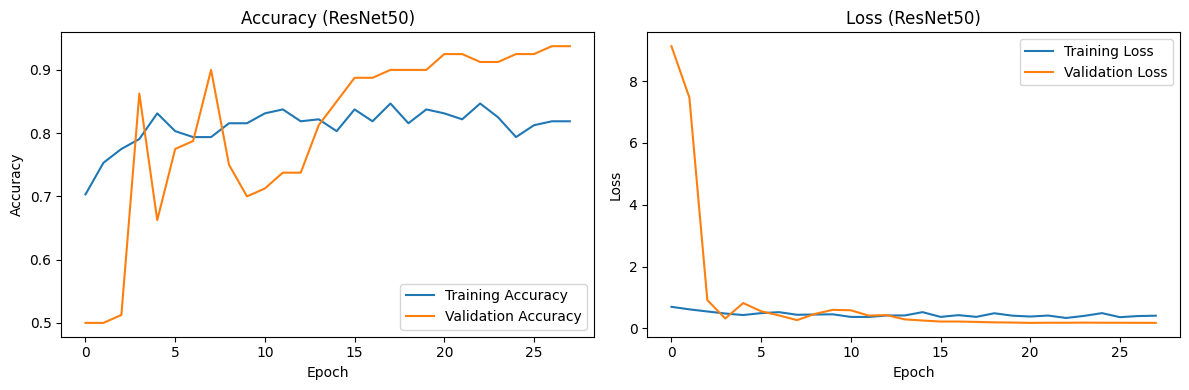

In [20]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (ResNet50)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Training Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Loss (ResNet50)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step
              precision    recall  f1-score   support

      female       0.90      0.95      0.93        40
        male       0.95      0.90      0.92        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80



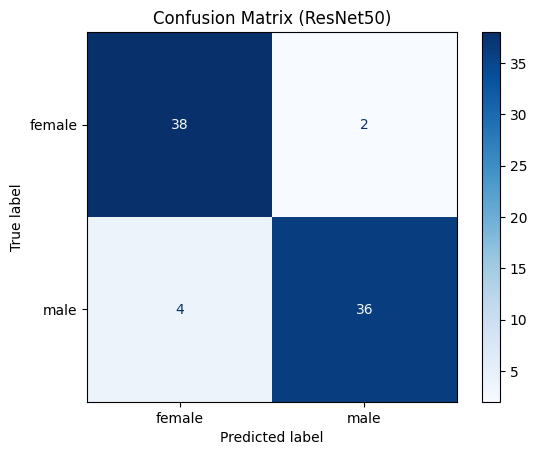

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = val_gen.classes

# Report
print(classification_report(y_true, y_pred, target_names=['female', 'male']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['female', 'male'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ResNet50)')
plt.show()

In [22]:
# 5. AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay


auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.9900


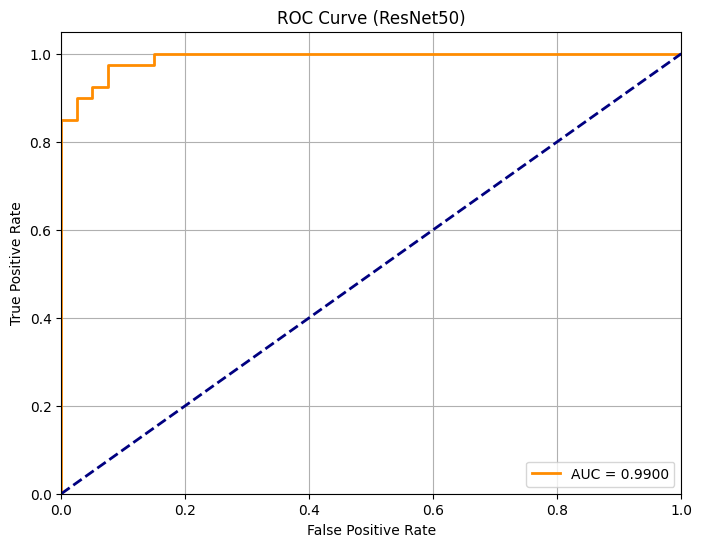

In [23]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ResNet50)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

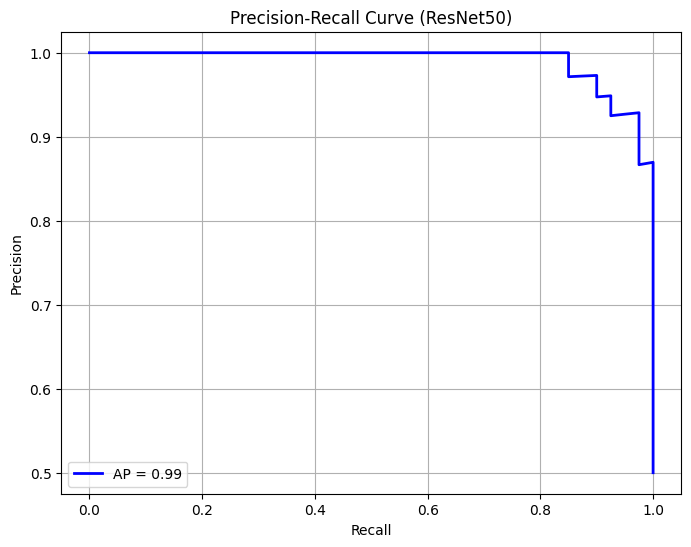

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall pairs and average precision
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)
ap_score = average_precision_score(y_true, y_pred_probs)

# Plot Precision-Recall Curve with AP score
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', linewidth=2, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (ResNet50)')
plt.grid(True)
plt.legend()
plt.show()
